In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Iris.csv')
data.sample(n=5)

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [ ]:
data.describe()

In [ ]:
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

In [3]:
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

NameError: name 'data' is not defined

In [ ]:
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(n=5)

In [ ]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,0.722222,0.458333,0.661017,0.583333,1
50,0.750000,0.500000,0.627119,0.541667,1
47,0.083333,0.500000,0.067797,0.041667,0
137,0.583333,0.458333,0.762712,0.708333,2
110,0.611111,0.500000,0.694915,0.791667,2


In [ ]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,train
40,0.194444,0.625000,0.050847,0.083333,0,True
132,0.583333,0.333333,0.779661,0.875000,2,True
121,0.361111,0.333333,0.661017,0.791667,2,False
88,0.361111,0.416667,0.525424,0.500000,1,True
128,0.583333,0.333333,0.779661,0.833333,2,True


In [ ]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
74,0.583333,0.375000,0.559322,0.500000,1
34,0.166667,0.458333,0.084746,0.000000,0
106,0.166667,0.208333,0.593220,0.666667,2
71,0.500000,0.333333,0.508475,0.500000,1
103,0.555556,0.375000,0.779661,0.708333,2


In [34]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,0.416667,0.833333,0.033898,0.041667,0
12,0.138889,0.416667,0.067797,0.000000,0
121,0.361111,0.333333,0.661017,0.791667,2
123,0.555556,0.291667,0.661017,0.708333,2
95,0.388889,0.416667,0.542373,0.458333,1


In [ ]:
X = train.values[:,:4]
X[:5]

array([[0.83333333, 0.375     , 0.89830508, 0.70833333],
       [0.69444444, 0.5       , 0.83050847, 0.91666667],
       [0.36111111, 0.41666667, 0.52542373, 0.5       ],
       [0.13888889, 0.58333333, 0.15254237, 0.04166667],
       [0.47222222, 0.375     , 0.59322034, 0.58333333]])

In [ ]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]

In [ ]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
print(w1)


[[ 0.93405968  0.0944645   0.94536872  0.42963199  0.39545765]
 [-0.56782101  0.95254891 -0.98753949 -0.49403528 -0.13041694]
 [ 0.55876584 -0.60462985  0.72598647  0.96680135 -0.67231552]
 [ 0.19466789 -0.9820278  -0.22685743 -0.91167988  0.91330594]]


In [37]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
print(w2)

[[-0.28725382  0.80915218 -0.24716105]
 [ 0.69344455  0.4668823   0.39796206]
 [ 0.33901975 -0.84004152 -0.91070434]
 [-0.80960384 -0.56513941  0.6140331 ]
 [-0.79923915 -0.87149726  0.88790134]]


In [ ]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

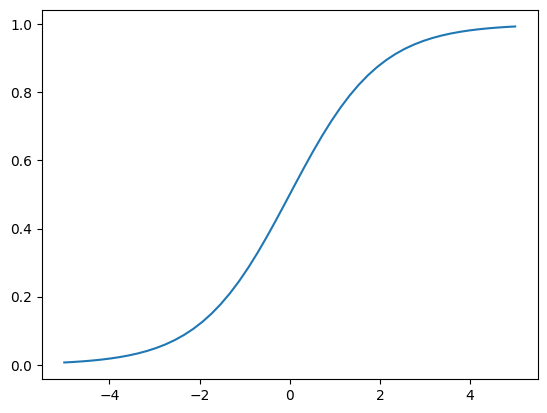

In [ ]:
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [ ]:
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use use square as well
    er = (abs(y - l2)).mean()
    error.append(er)

    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # udpate weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate
    
print('Error:', er)

Error: 0.12911425301780813


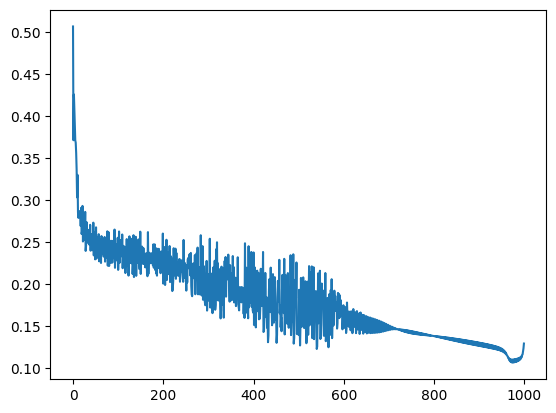

In [ ]:
plt.plot(error)

In [35]:
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[0.999, 0.003, 0.   ],
       [0.998, 0.018, 0.   ],
       [0.999, 0.   , 0.   ],
       [0.998, 0.001, 0.   ],
       [0.998, 0.003, 0.   ],
       [0.996, 0.008, 0.   ],
       [0.999, 0.001, 0.   ],
       [0.999, 0.006, 0.   ],
       [0.999, 0.   , 0.   ],
       [0.007, 0.99 , 0.   ],
       [0.001, 0.884, 0.008],
       [0.   , 0.057, 0.941],
       [0.   , 0.052, 0.94 ],
       [0.039, 0.999, 0.   ],
       [0.   , 0.021, 0.971],
       [0.   , 0.023, 0.97 ],
       [0.   , 0.065, 0.87 ],
       [0.   , 0.02 , 0.972]])

In [36]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['Species']].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

             Species       Prediction
2        Iris-setosa      Iris-setosa
12       Iris-setosa      Iris-setosa
14       Iris-setosa      Iris-setosa
18       Iris-setosa      Iris-setosa
20       Iris-setosa      Iris-setosa
23       Iris-setosa      Iris-setosa
27       Iris-setosa      Iris-setosa
29       Iris-setosa      Iris-setosa
33       Iris-setosa      Iris-setosa
56   Iris-versicolor  Iris-versicolor
65   Iris-versicolor  Iris-versicolor
72   Iris-versicolor   Iris-virginica
83   Iris-versicolor   Iris-virginica
95   Iris-versicolor  Iris-versicolor
121   Iris-virginica   Iris-virginica
123   Iris-virginica   Iris-virginica
137   Iris-virginica   Iris-virginica
147   Iris-virginica   Iris-virginica
Correct: 16 / 18 : 88.88888888888889 %
